<a href="https://colab.research.google.com/github/Kalazclint/River_gage_height_forecasting/blob/main/Gage_Height_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = '/content/drive/My Drive/dataset_2015_2020.xlsx'
data = pd.read_excel(path)
data.head()

,Date/Time,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120
0,2015-01-01 00:00:00-06:00,13.79,1.91,17.87,1.70
1,2015-01-01 00:15:00-06:00,13.79,1.91,17.85,1.71
2,2015-01-01 00:30:00-06:00,13.79,1.90,17.86,1.72
3,2015-01-01 00:45:00-06:00,13.79,1.90,17.85,1.72
4,2015-01-01 01:00:00-06:00,13.79,1.90,17.85,1.72


In [ ]:
data.shape

(210431, 5)

In [ ]:
data.isnull().sum()

Date/Time                         0
gage_height_ft_sensor_07377600    0
gage_height_ft_sensor_07377760    0
gage_height_ft_sensor_07378050    0
gage_height_ft_sensor_07380120    0
dtype: int64

In [ ]:
data.describe()

,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120
count,210431.000000,210431.000000,210431.000000,210431.000000
mean,14.138579,2.195239,19.600865,2.376064
std,1.462028,2.294581,4.158887,1.191726
min,12.960000,0.830000,16.420000,-0.280000
25%,13.450000,1.220000,17.500000,1.750000
50%,13.770000,1.480000,18.050000,2.230000
75%,14.230000,2.127746,19.540000,2.760000
max,38.980000,29.360000,54.060000,17.900000


In [ ]:
values = data.values

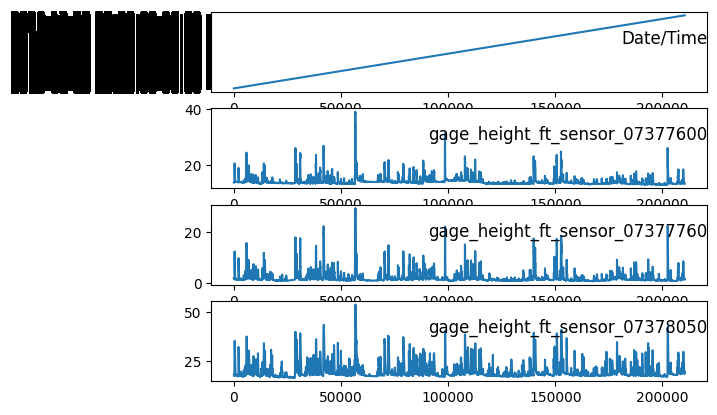

In [ ]:
groups = [0,1,2,3]
i=1

for group in groups:
    plt.subplot(len(groups),1,i)
    plt.plot(values[:,group])
    plt.title(data.columns[group], y=0.5, loc="right")
    i +=1

plt.show()


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210431 entries, 0 to 210430
Data columns (total 5 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Date/Time                       210431 non-null  object 
 1   gage_height_ft_sensor_07377600  210431 non-null  float64
 2   gage_height_ft_sensor_07377760  210431 non-null  float64
 3   gage_height_ft_sensor_07378050  210431 non-null  float64
 4   gage_height_ft_sensor_07380120  210431 non-null  float64
dtypes: float64(4), object(1)
memory usage: 8.0+ MB


In [ ]:
data['Date/Time'] = pd.to_datetime(data['Date/Time'])

In [ ]:

data['hour'] = data['Date/Time'].dt.hour
data['day_of_week'] = data['Date/Time'].dt.dayofweek
data['month'] = data['Date/Time'].dt.month

In [ ]:
#Resetting Index to Date data
data.set_index('Date/Time', inplace=True)

In [ ]:
# Calculate rolling statistics for each variable
rolling_mean_var1 = data['gage_height_ft_sensor_07377600'].rolling(window=12).mean()
rolling_std_var1 = data['gage_height_ft_sensor_07377600'].rolling(window=12).std()
rolling_mean_var2 = data['gage_height_ft_sensor_07377760'].rolling(window=12).mean()
rolling_std_var2 = data['gage_height_ft_sensor_07377760'].rolling(window=12).std()
rolling_mean_var3 = data['gage_height_ft_sensor_07378050'].rolling(window=12).mean()
rolling_std_var3 = data['gage_height_ft_sensor_07378050'].rolling(window=12).std()
rolling_mean_var4 = data['gage_height_ft_sensor_07380120'].rolling(window=12).mean()
rolling_std_var4 = data['gage_height_ft_sensor_07380120'].rolling(window=12).std()



In [ ]:
# Create summary statistics plot for each variable
plt.subplot(3, 1, 1)
plt.plot(data['gage_height_ft_sensor_07377600'], color='blue', label='Original')
plt.plot(rolling_mean_var1, color='red', label='Rolling Mean')
plt.plot(rolling_std_var1, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('gage_height_ft_sensor_07377600 Summary Statistics Plot')


plt.subplot(3, 1, 2)
plt.plot(data['gage_height_ft_sensor_07377760'], color='blue', label='Original')
plt.plot(rolling_mean_var2, color='red', label='Rolling Mean')
plt.plot(rolling_std_var2, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('gage_height_ft_sensor_07377760 Summary Statistics Plot')

plt.subplot(3, 1, 3)
plt.plot(data['gage_height_ft_sensor_07378050'], color='blue', label='Original')
plt.plot(rolling_mean_var3, color='red', label='Rolling Mean')
plt.plot(rolling_std_var3, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('gage_height_ft_sensor_07378050 Summary Statistics Plot')


plt.subplot(3, 2, 1)
plt.plot(data['gage_height_ft_sensor_07380120'], color='blue', label='Original')
plt.plot(rolling_mean_var4, color='red', label='Rolling Mean')
plt.plot(rolling_std_var4, color='green', label='Rolling Std')
plt.legend(loc='best')
plt.title('gage_height_ft_sensor_07380120 Summary Statistics Plot')


plt.tight_layout()
plt.show()

<ipython-input-7-f0a72cc32b33>:25: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 2, 1)


In [ ]:
data.shape

(210431, 5)

In [ ]:
from statsmodels.tsa.stattools import adfuller
for column in data.columns:
    result = adfuller(data[column])
    print(f'ADF test results for {column}:')
    print(f'ADF statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical values: {result[4]}')
    if result[1] > 0.05:
        print(f'{column} is likely non-stationary')
    else:
        print(f'{column} is likely stationary')
    print('--------------------------------------------')

ADF test results for gage_height_ft_sensor_07377600:
ADF statistic: -21.870038667316614
p-value: 0.0
Critical values: {'1%': -3.4303810883859263, '5%': -2.861553740658953, '10%': -2.5667773136581}
gage_height_ft_sensor_07377600 is likely stationary
--------------------------------------------
ADF test results for gage_height_ft_sensor_07377760:
ADF statistic: -21.96335598004473
p-value: 0.0
Critical values: {'1%': -3.4303810883859263, '5%': -2.861553740658953, '10%': -2.5667773136581}
gage_height_ft_sensor_07377760 is likely stationary
--------------------------------------------
ADF test results for gage_height_ft_sensor_07378050:
ADF statistic: -18.57734396485259
p-value: 2.0796133921673316e-30
Critical values: {'1%': -3.4303810882381303, '5%': -2.8615537405936298, '10%': -2.566777313623331}
gage_height_ft_sensor_07378050 is likely stationary
--------------------------------------------
ADF test results for gage_height_ft_sensor_07380120:
ADF statistic: -16.56641825512964
p-value: 1.

In [ ]:
n = 50
chunks = np.array_split(data, n)

# Calculate the mean and variance of each chunk of the 4 columns
means = pd.DataFrame(columns=['gage_height_ft_sensor_07377600', 'gage_height_ft_sensor_07377760', 'gage_height_ft_sensor_07378050', 'gage_height_ft_sensor_07380120'])
variances = pd.DataFrame(columns=['gage_height_ft_sensor_07377600', 'gage_height_ft_sensor_07377760', 'gage_height_ft_sensor_07378050', 'gage_height_ft_sensor_07380120'])
for chunk in chunks:
    means = means.append(chunk.mean(), ignore_index=True)
    variances = variances.append(chunk.var(), ignore_index=True)

# Create a table of means and variances
#stats = pd.concat([means, variances], axis=1)
#stats.insert(0, 'Chunk', range(1, n+1))

means

<ipython-input-20-0045334892d7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(chunk.mean(), ignore_index=True)
<ipython-input-20-0045334892d7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variances = variances.append(chunk.var(), ignore_index=True)
<ipython-input-20-0045334892d7>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(chunk.mean(), ignore_index=True)
<ipython-input-20-0045334892d7>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  variances = variances.append(chunk.var(), ignore_index=True)
<ipython-input-20-0045334892d7>:8: FutureWarning: The frame.append method is deprecated an

,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120
0,14.368678,2.327904,19.489062,1.718449
1,15.031159,3.243742,21.139427,1.929627
2,14.041247,2.399373,19.473348,2.130672
3,14.553416,2.779147,20.253425,2.433036
4,13.770596,1.568382,17.986469,1.247277
5,13.620330,1.260701,17.145745,1.807249
6,14.440276,2.741614,20.149811,3.090532
7,14.298565,2.591053,20.422794,3.057703
8,14.105488,2.553005,20.386935,2.609449
9,15.358533,4.135367,22.680397,2.513950


In [ ]:
variances

,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120
0,1.512097,4.366610,19.884989,0.448828
1,4.028317,7.322490,22.956212,0.828952
2,0.554063,2.008077,8.512494,0.367344
3,1.927818,4.353339,17.256889,0.438324
4,0.082070,0.468123,4.790687,0.243177
5,0.033804,0.154042,0.955537,0.188400
6,5.531359,14.216938,52.149077,2.801019
7,3.323022,8.813688,26.862314,1.286208
8,0.474008,1.263492,7.225721,0.262032
9,8.102369,21.582968,51.555754,3.967588


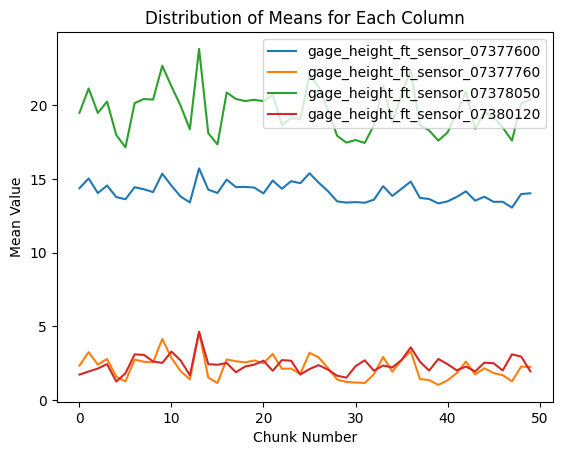

In [ ]:
fig, ax = plt.subplots()
means.plot(ax=ax, kind='line', legend=True)
ax.set_title('Distribution of Means for Each Column')
ax.set_xlabel('Chunk Number')
ax.set_ylabel('Mean Value')
plt.show()

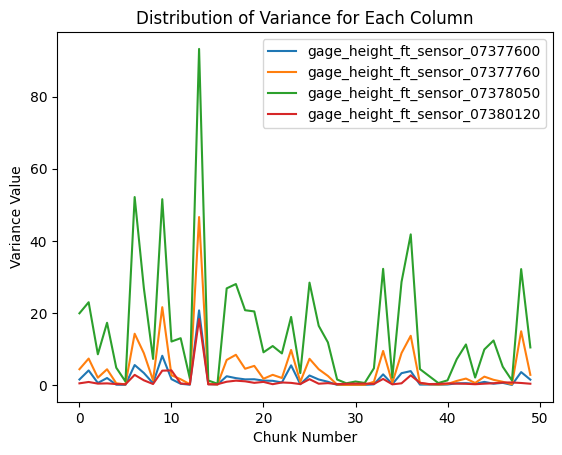

In [ ]:
fig, ax = plt.subplots()
variances.plot(ax=ax, kind='line', legend=True)
ax.set_title('Distribution of Variance for Each Column')
ax.set_xlabel('Chunk Number')
ax.set_ylabel('Variance Value')
plt.show()

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
values = data.values

In [ ]:
values

array([[13.79,  1.91, 17.87,  1.7 ],
       [13.79,  1.91, 17.85,  1.71],
       [13.79,  1.9 , 17.86,  1.72],
       ...,
       [13.34,  1.66, 19.62,  2.35],
       [13.34,  1.65, 19.7 ,  2.35],
       [13.35,  1.66, 19.77,  2.33]])

In [ ]:
data.head()

,gage_height_ft_sensor_07377600,gage_height_ft_sensor_07377760,gage_height_ft_sensor_07378050,gage_height_ft_sensor_07380120
Date/Time,,,,
2015-01-01 00:00:00-06:00,13.79,1.91,17.87,1.70
2015-01-01 00:15:00-06:00,13.79,1.91,17.85,1.71
2015-01-01 00:30:00-06:00,13.79,1.90,17.86,1.72
2015-01-01 00:45:00-06:00,13.79,1.90,17.85,1.72
2015-01-01 01:00:00-06:00,13.79,1.90,17.85,1.72


In [ ]:
df = data[['Date/Time','gage_height_ft_sensor_07377600']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error

In [ ]:
# Step 3: Data Split
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

In [ ]:
# Step 4: Normalization
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['gage_height_ft_sensor_07377600']])
test_scaled = scaler.transform(test_data[['gage_height_ft_sensor_07377600']])

In [ ]:
sequence_length = 24  # Number of time steps to look back
train_sequences = []
train_labels = []
test_sequences = []
test_labels = []

for i in range(len(train_scaled) - sequence_length):
    train_sequences.append(train_scaled[i:i + sequence_length])
    train_labels.append(train_scaled[i + sequence_length])

for i in range(len(test_scaled) - sequence_length):
    test_sequences.append(test_scaled[i:i + sequence_length])
    test_labels.append(test_scaled[i + sequence_length])


In [ ]:
# Convert the lists to numpy arrays
X_train = np.array(train_sequences)
y_train = np.array(train_labels)
X_test = np.array(test_sequences)
y_test = np.array(test_labels)

In [ ]:
model = Sequential()
model.add(LSTM(50, input_shape=(sequence_length, 1)))
model.add(Dense(1))


In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

Epoch 1/10
5260/5260 [==============================] - 72s 13ms/step - loss: 3.0791e-05
Epoch 2/10
5260/5260 [==============================] - 69s 13ms/step - loss: 3.3819e-06
Epoch 3/10
5260/5260 [==============================] - 66s 13ms/step - loss: 2.2391e-06
Epoch 4/10
5260/5260 [==============================] - 65s 12ms/step - loss: 2.1160e-06
Epoch 5/10
5260/5260 [==============================] - 67s 13ms/step - loss: 1.8937e-06
Epoch 6/10
5260/5260 [==============================] - 65s 12ms/step - loss: 1.8623e-06
Epoch 7/10
5260/5260 [==============================] - 68s 13ms/step - loss: 1.7548e-06
Epoch 8/10
5260/5260 [==============================] - 66s 13ms/step - loss: 1.6698e-06
Epoch 9/10
5260/5260 [==============================] - 67s 13ms/step - loss: 1.5739e-06
Epoch 10/10
5260/5260 [==============================] - 67s 13ms/step - loss: 1.6757e-06


In [ ]:
# Step 8: Model Evaluation
train_predictions = model.predict(X_train)
train_predictions = scaler.inverse_transform(train_predictions)
train_actual = scaler.inverse_transform(y_train)
train_rmse = np.sqrt(mean_squared_error(train_actual, train_predictions))

test_predictions = model.predict(X_test)
test_predictions = scaler.inverse_transform(test_predictions)
test_actual = scaler.inverse_transform(y_test)
test_rmse = np.sqrt(mean_squared_error(test_actual, test_predictions))


1315/1315 [==============================] - 8s 6ms/step


In [ ]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.03247907901440029
Test RMSE: 0.018628687930229634


In [ ]:
#Prediction
future_input = test_scaled[-sequence_length:]
future_input = np.reshape(future_input, (1, sequence_length, 1))
future_predictions = model.predict(future_input)
future_predictions = scaler.inverse_transform(future_predictions)
print("Future Predictions:", future_predictions)

1/1 [==============================] - 0s 29ms/step
Future Predictions: [[13.335164]]


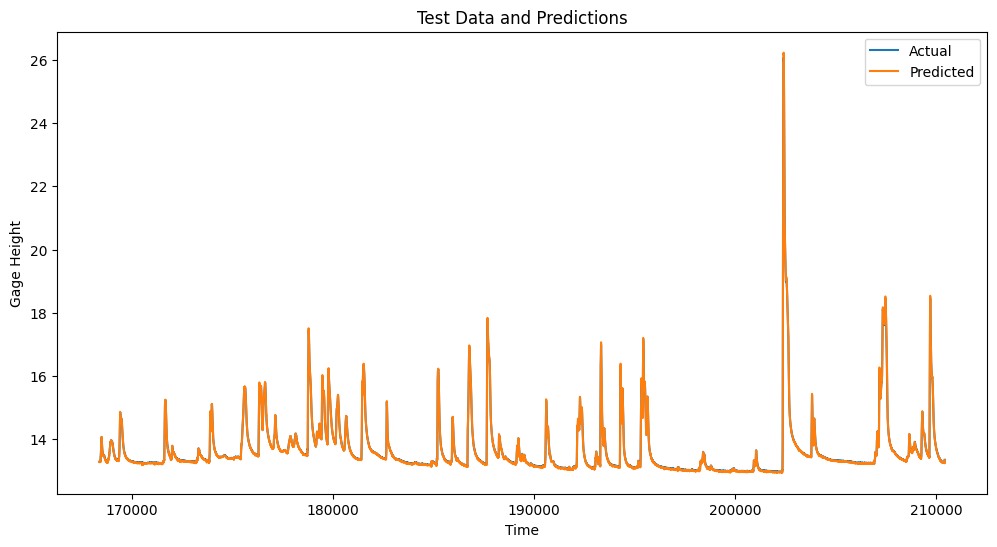

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(test_data.index[sequence_length:], test_actual, label='Actual')
plt.plot(test_data.index[sequence_length:], test_predictions, label='Predicted')
plt.xlabel('Time')
plt.ylabel('Gage Height')
plt.title('Test Data and Predictions')
plt.legend()
plt.show()